In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [2]:
# Creating Dataset
X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_classes = 3,
    n_clusters_per_class = 1
)

In [3]:
X

array([[ 1.88914192, -0.44354253],
       [-0.76206451,  1.03091411],
       [ 1.85530097, -0.42734944],
       ...,
       [-0.8212686 ,  1.0322542 ],
       [-0.66007683, -1.8051806 ],
       [ 0.22432557, -1.69704395]])

In [4]:
# OHE output column - require for applying softmax activation
y_1 = keras.utils.to_categorical(y)
y_1

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

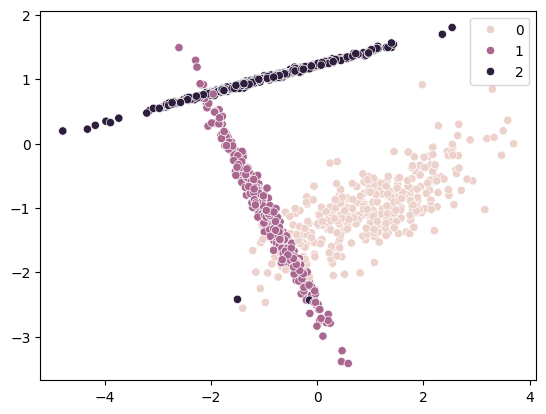

In [5]:
# Plotting
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.show()

In [6]:
# Building Neural Network Architecture
model = Sequential()

model.add(Input(shape = (2,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Training the model
history = model.fit(x = X, y = y_1, validation_split = 0.2, epochs = 10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.3290 - loss: 1.1697 - val_accuracy: 0.4950 - val_loss: 1.0686
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4932 - loss: 1.0521 - val_accuracy: 0.5300 - val_loss: 0.9902
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5566 - loss: 0.9657 - val_accuracy: 0.6400 - val_loss: 0.8813
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7466 - loss: 0.8666 - val_accuracy: 0.8150 - val_loss: 0.7729
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8276 - loss: 0.7694 - val_accuracy: 0.8400 - val_loss: 0.6993
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8726 - loss: 0.7186 - val_accuracy: 0.8600 - val_loss: 0.6455
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8595 - loss: 0.6472 - val_accuracy: 0.8550 - val_loss: 0.6062
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8426 - loss: 0.6669 - val_accuracy: 0.8700 - val_lo

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


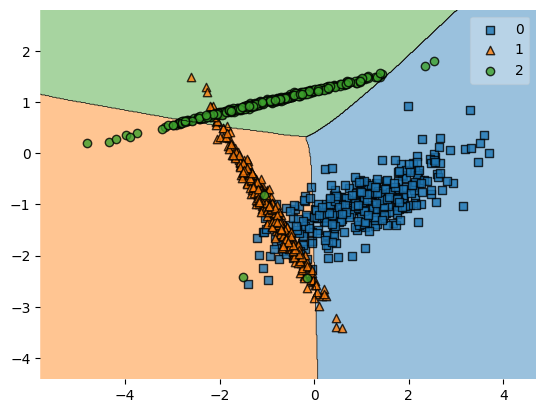

In [10]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Wrapper so the model can be used with mlxtend
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        pred = self.model.predict(X)
        return np.argmax(pred, axis=1)

# Use the wrapper
wrapped_model = KerasClassifierWrapper(model)

# Plot decision boundary
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()

In [13]:
# Building Neural Network Architecture
model_2 = Sequential()

model_2.add(Input(shape = (2,), batch_size = 32))
model_2.add(Dense(units = 15, activation = 'relu'))
model_2.add(Dense(units = 10, activation = 'relu'))
model_2.add(Dense(units = 5, activation = 'relu'))
model_2.add(Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 836 (3.27 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 558 (2.18 KB)

In [14]:
# Compiling the model
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Training the model
history_2 = model_2.fit(x = X, y = y, validation_split = 0.2, epochs = 10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4022 - loss: 1.0291 - val_accuracy: 0.6200 - val_loss: 0.9975
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6776 - loss: 0.9641 - val_accuracy: 0.8200 - val_loss: 0.9213
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8073 - loss: 0.8708 - val_accuracy: 0.7750 - val_loss: 0.8223
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7792 - loss: 0.7801 - val_accuracy: 0.7750 - val_loss: 0.7180
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7677 - loss: 0.6846 - val_accuracy: 0.7800 - val_loss: 0.6430
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.6446 - val_accuracy: 0.8150 - val_loss: 0.5879
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8124 - loss: 0.5664 - val_accuracy: 0.8550 - val_loss: 0.5467
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8202 - loss: 0.5360 - val_accuracy: 0.8650 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


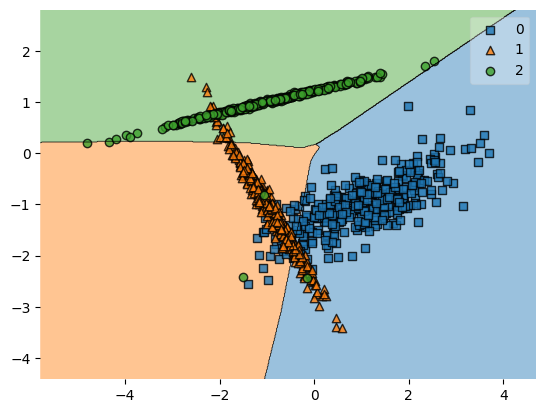

In [16]:
# Wrapper so the model can be used with mlxtend
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        pred = self.model.predict(X)
        return np.argmax(pred, axis=1)

# Use the wrapper
wrapped_model = KerasClassifierWrapper(model_2)

# Plot decision boundary
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()

---

In [29]:
# Simulate linear relationship: y = Xw + b + noise
np.random.seed(42)  # For reproducibility

num_samples = 1000
num_features = 1

X_train = np.random.rand(num_samples, num_features)

# Define true weights and bias
true_weights = np.arange(1, num_features + 1) * 0.5  # shape (10,)
true_bias = 2.0

# Generate y with some Gaussian noise
y_train = X_train @ true_weights + true_bias + np.random.normal(0, 0.1, size=(num_samples,))

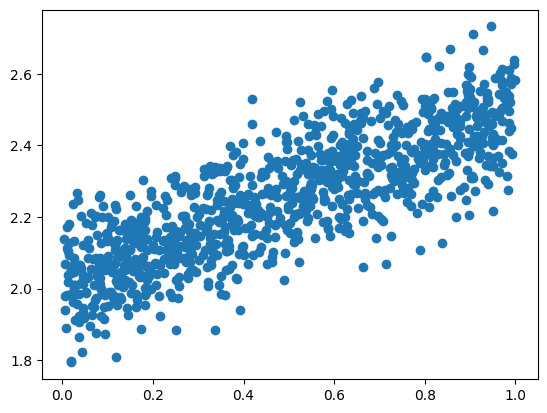

In [30]:
plt.scatter(X_train, y_train)

In [34]:
# Sample regression model
model = Sequential([
    Input(shape = (1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile using Huber loss
model.compile(
    optimizer='adam',
    loss=keras.losses.Huber(delta=1.0),  # You can tweak delta
    metrics=['mae', 'r2_score']
)

# Train the model
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.5692 - mae: 2.0692 - r2_score: -146.3604
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6435 - mae: 1.1106 - r2_score: -41.6712
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1491 - mae: 0.4682 - r2_score: -8.6660
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0936 - mae: 0.3674 - r2_score: -5.1915
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0666 - mae: 0.3114 - r2_score: -3.5636
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0454 - mae: 0.2588 - r2_score: -1.8827
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - mae: 0.1938 - r2_score: -0.8411
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 - mae: 0.1503 - r2_score: -0.1846
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - mae: 0.1129 - r2_score: 0.3789
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mae: 0.0920 - r2_score: 0.5316


In [46]:
y_pred = model.predict(np.array(sorted(X_train)).reshape(-1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


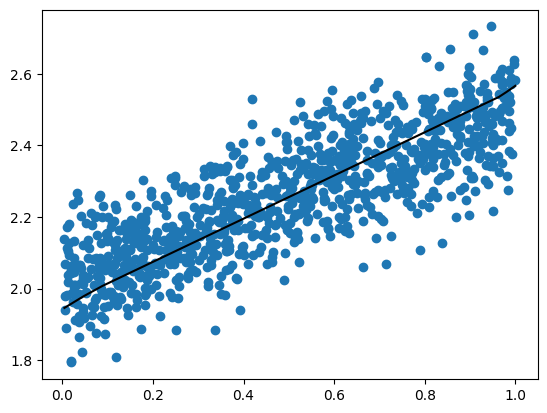

In [49]:
plt.scatter(X_train, y_train)
plt.plot(sorted(X_train), y_pred, color = 'black')

In [50]:
# Sample regression model
model = Sequential([
    Input(shape = (1,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile using Huber loss
model.compile(
    optimizer='adam',
    loss='mse',  # You can tweak delta
    metrics=['mae', 'r2_score']
)

# Train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.3189 - mae: 2.0694 - r2_score: -141.8696
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8400 - mae: 1.3142 - r2_score: -60.4018
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3522 - mae: 0.5012 - r2_score: -11.8410
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2744 - mae: 0.4487 - r2_score: -7.6114
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2097 - mae: 0.3928 - r2_score: -6.0009
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1707 - mae: 0.3535 - r2_score: -4.7496
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1330 - mae: 0.3103 - r2_score: -3.4784
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0995 - mae: 0.2624 - r2_score: -2.3621
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - mae: 0.2341 - r2_score: -1.4489
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0511 - mae: 0.1883 - r2_score: -0.7446


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


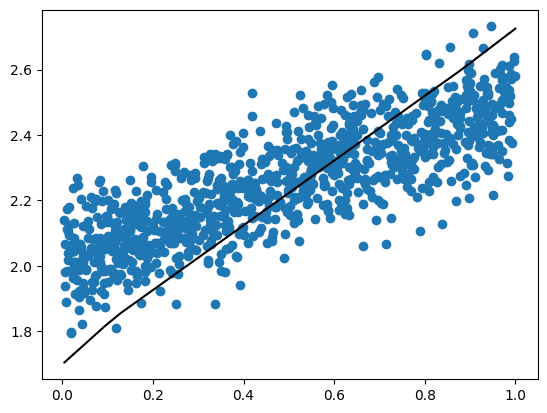

In [51]:
y_pred = model.predict(np.array(sorted(X_train)).reshape(-1))
plt.scatter(X_train, y_train)
plt.plot(sorted(X_train), y_pred, color = 'black')